# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key)


c8f02ea63201c6d84462a59548b22778


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests. get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | nadi
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | talcahuano
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | mafeteng
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | ust-tsilma
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | shache
Processing Record 21 of Set 1 | hamilton
Processing Record 22 

Processing Record 39 of Set 4 | cill airne
Processing Record 40 of Set 4 | thinadhoo
Processing Record 41 of Set 4 | hammerfest
Processing Record 42 of Set 4 | tingo maria
Processing Record 43 of Set 4 | ribnitz-damgarten
Processing Record 44 of Set 4 | holma
Processing Record 45 of Set 4 | coahuayana de hidalgo
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | fort st. john
Processing Record 0 of Set 5 | aripuana
Processing Record 1 of Set 5 | tsiombe
Processing Record 2 of Set 5 | west island
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | pontevico
Processing Record 5 of Set 5 | midwest city
Processing Record 6 of Set 5 | bolama
Processing Record 7 of Set 5 | chilaw
Processing Record 8 of Set 5 | tofol
Processing Record 9 of Set 5 | gwadar
Processing Record 10 of Set 5 | waldfischbach-burgalben
Processing Record 11 of Set 5 | arauquita
Processing Record

Processing Record 34 of Set 8 | torzhok
Processing Record 35 of Set 8 | prineville
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | tongliao
Processing Record 38 of Set 8 | la passe
Processing Record 39 of Set 8 | saint croix
Processing Record 40 of Set 8 | witu
Processing Record 41 of Set 8 | nuuk
Processing Record 42 of Set 8 | erdenet
Processing Record 43 of Set 8 | ende
Processing Record 44 of Set 8 | aswan
Processing Record 45 of Set 8 | wenchang
Processing Record 46 of Set 8 | gandajika
Processing Record 47 of Set 8 | santiago del estero
Processing Record 48 of Set 8 | rupert
Processing Record 49 of Set 8 | port mathurin
Processing Record 0 of Set 9 | haapsalu
Processing Record 1 of Set 9 | valley city
Processing Record 2 of Set 9 | puerto armuelles
Processing Record 3 of Set 9 | tucumcari
Processing Record 4 of Set 9 | rongelap
Processing Record 5 of Set 9 | puerto lempira
Processing Record 6 of Set 9 | al burayqah
Processing Record 7 of Set 9 | sungai pe

Processing Record 26 of Set 12 | milevsko
Processing Record 27 of Set 12 | kizel
Processing Record 28 of Set 12 | souillac
Processing Record 29 of Set 12 | christchurch
Processing Record 30 of Set 12 | ovruch
Processing Record 31 of Set 12 | mengcheng chengguanzhen
Processing Record 32 of Set 12 | ouellah
City not found. Skipping...
Processing Record 33 of Set 12 | howrah
Processing Record 34 of Set 12 | comodoro rivadavia
Processing Record 35 of Set 12 | chambas
Processing Record 36 of Set 12 | carloforte
Processing Record 37 of Set 12 | preobrazheniye
Processing Record 38 of Set 12 | krasnokamsk
Processing Record 39 of Set 12 | priob'ye
Processing Record 40 of Set 12 | paita
Processing Record 41 of Set 12 | puerto baquerizo moreno
Processing Record 42 of Set 12 | punta del este
Processing Record 43 of Set 12 | riachao das neves
Processing Record 44 of Set 12 | deqen
Processing Record 45 of Set 12 | novo aripuana
Processing Record 46 of Set 12 | mercedes
Processing Record 47 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,-1.57,86,75,6.17,CA,1701895533
1,edinburgh of the seven seas,-37.0676,-12.3116,14.35,76,10,8.10,SH,1701895534
2,bethel,41.3712,-73.4140,3.62,71,100,2.57,US,1701895518
3,nadi,-17.8000,177.4167,28.00,69,20,2.06,FJ,1701895534
4,klyuchi,52.2667,79.1667,-12.12,68,100,9.04,RU,1701895534


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-1.57,86,75,6.17,CA,1701895533
1,edinburgh of the seven seas,-37.0676,-12.3116,14.35,76,10,8.10,SH,1701895534
2,bethel,41.3712,-73.4140,3.62,71,100,2.57,US,1701895518
3,nadi,-17.8000,177.4167,28.00,69,20,2.06,FJ,1701895534
4,klyuchi,52.2667,79.1667,-12.12,68,100,9.04,RU,1701895534


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

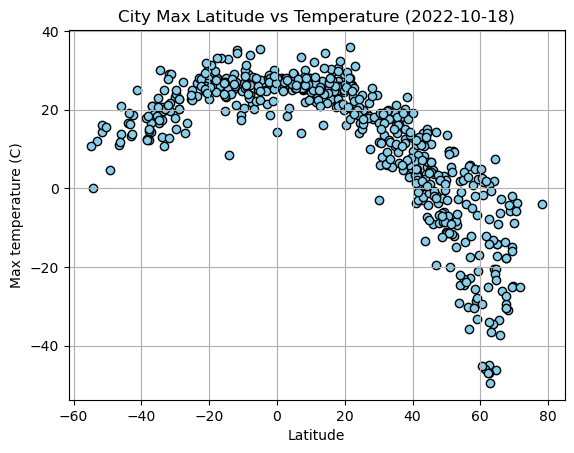

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black", facecolor="skyblue")


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.ylabel("Max temperature (C)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()

#### Latitude Vs. Humidity

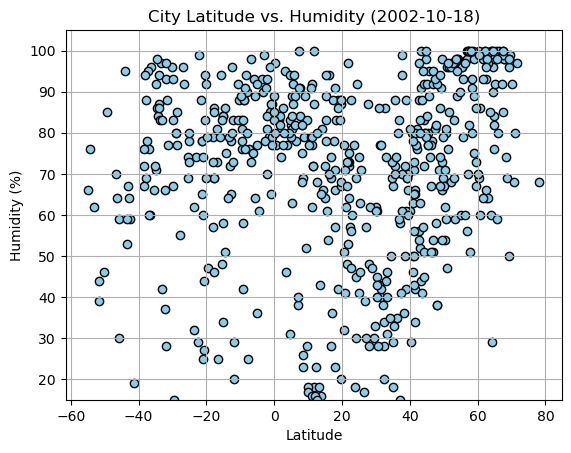

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Humidity (2002-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude") 
plt.ylim(15,105)
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

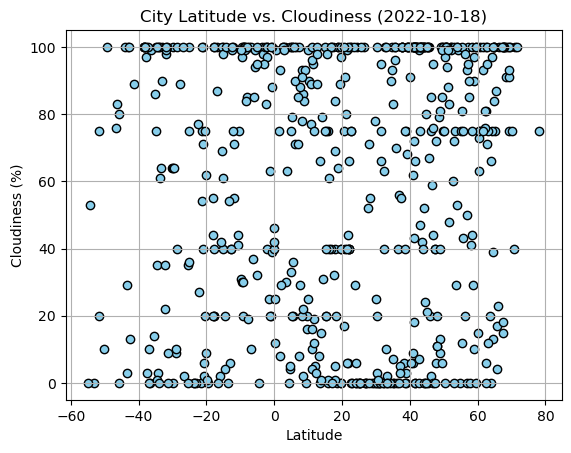

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True,)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

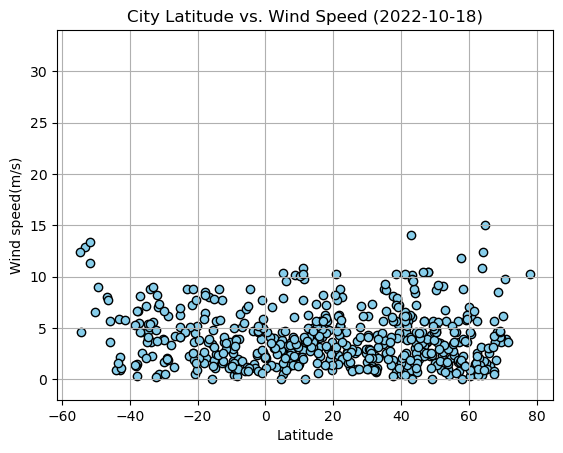

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind speed(m/s)")
plt.xlabel("Latitude") 
plt.ylim(-2,34)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-1.57,86,75,6.17,CA,1701895533
2,bethel,41.3712,-73.4140,3.62,71,100,2.57,US,1701895518
4,klyuchi,52.2667,79.1667,-12.12,68,100,9.04,RU,1701895534
6,olonkinbyen,70.9221,-8.7187,-3.64,80,100,3.91,SJ,1701895534
12,hawaiian paradise park,19.5933,-154.9731,25.57,87,40,0.89,US,1701895509


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-1.57,86,75,6.17,CA,1701895533
2,bethel,41.3712,-73.4140,3.62,71,100,2.57,US,1701895518
4,klyuchi,52.2667,79.1667,-12.12,68,100,9.04,RU,1701895534
6,olonkinbyen,70.9221,-8.7187,-3.64,80,100,3.91,SJ,1701895534
12,hawaiian paradise park,19.5933,-154.9731,25.57,87,40,0.89,US,1701895509


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

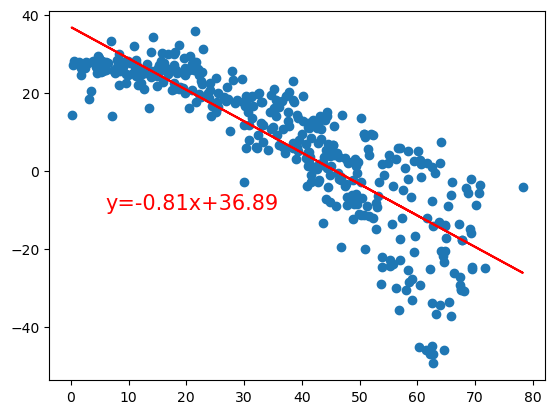

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))



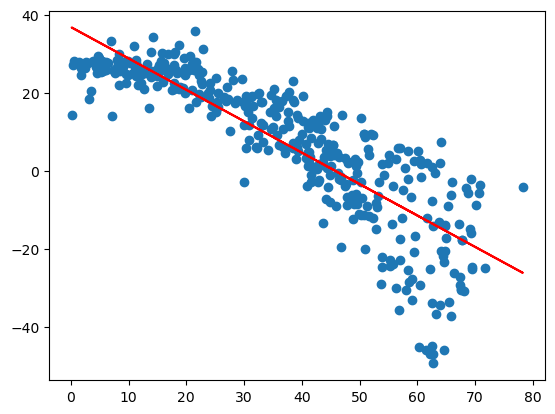

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(x_values, y_values, "Max Temp",(90,-50))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

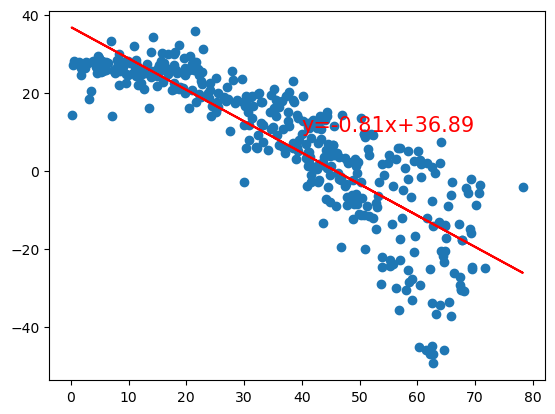

In [20]:
# Northern Hemisphere
plot_linear_regression(x_values, y_values,"Humidity",(40,10))


The r-value is: 0.0002808747046324607


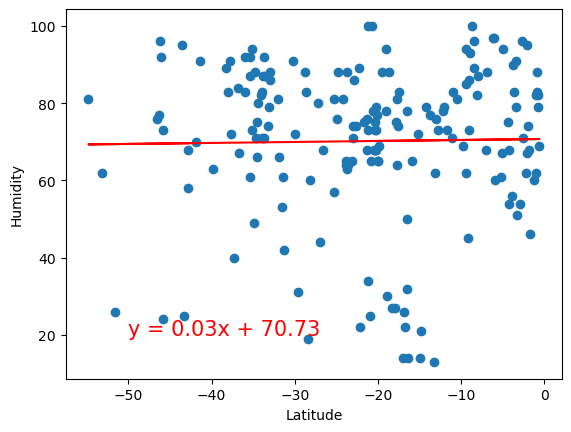

In [18]:
# Southern Hemisphere
plot_linear_regression(x_values, y_values,"Humidity",(-50,20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

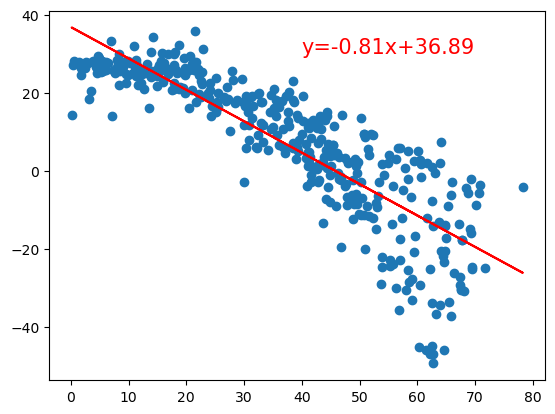

In [23]:
# Northern Hemisphere
plot_linear_regression(x_values, y_values,"Cloudiness",(40,30))


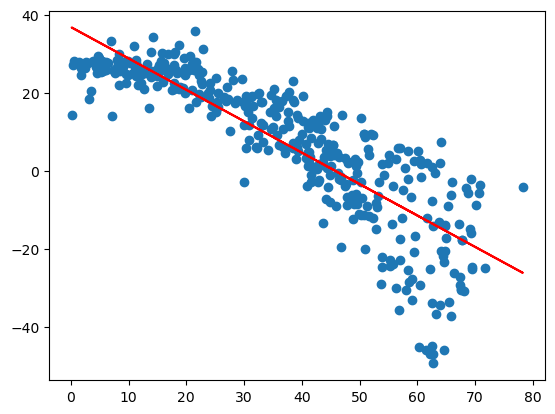

In [29]:
# Southern Hemisphere
plot_linear_regression(x_values, y_values,"Cloudiness",(-30,30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

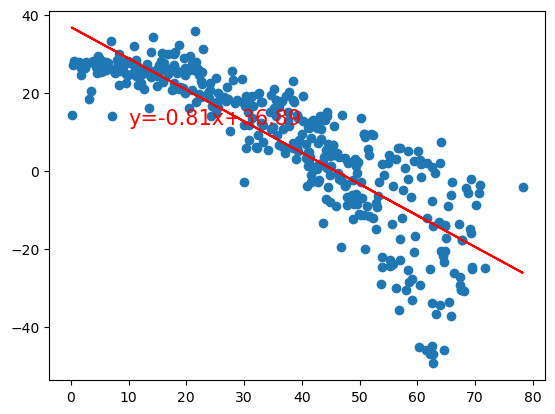

In [25]:
# Northern Hemisphere
plot_linear_regression(x_values, y_values,"Wind speed",(10,12))


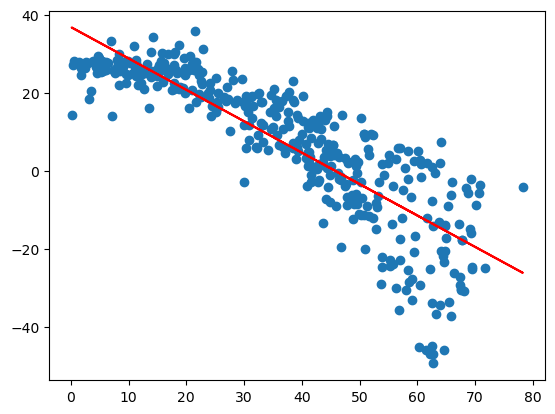

In [28]:
# Southern Hemisphere
plot_linear_regression(x_values, y_values,"Wind speed",(-50,12))


**Discussion about the linear relationship:** YOUR RESPONSE HERE